In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Load the datasets
dataframe_fake = pd.read_csv("Fake.csv")
dataframe_true = pd.read_csv("True.csv")

In [3]:
# Display the head of the fake dataset
dataframe_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Assign labels to the datasets
dataframe_fake["class"] = 0
dataframe_true["class"] = 1

In [5]:
# Merge the datasets and reset index
dataframe_merge = pd.concat([dataframe_fake, dataframe_true], axis=0)
dataframe_merge.reset_index(drop=True, inplace=True)

In [6]:
# Assignment 2: Preprocessing and Cleaning
# Remove unnecessary columns
dataframe = dataframe_merge.drop(["title", "subject", "date"], axis=1)

In [7]:
# Check for null values
dataframe.isnull().sum()


text     0
class    0
dtype: int64

In [8]:
# Shuffle the dataframe
dataframe = dataframe.sample(frac=1)
dataframe.reset_index(inplace=True)
dataframe.drop(["index"], axis=1, inplace=True)


In [9]:
# Function for text preprocessing
def wordopt(t):
    tt = t.lower()
    t = re.sub('\[.*?\]','', t)
    t = re.sub("\\W", " ", t)
    t = re.sub('https?://\S+|www\.\S+','', t)
    t = re.sub('<.*?>+','', t)
    t = re.sub('[%s]' % re.escape(string.punctuation), '', t)
    t = re.sub('\n','', t)
    t = re.sub('\w*\d\w*','', t)
    return t

In [10]:
# Apply text preprocessing
dataframe["text"] = dataframe["text"].apply(wordopt)

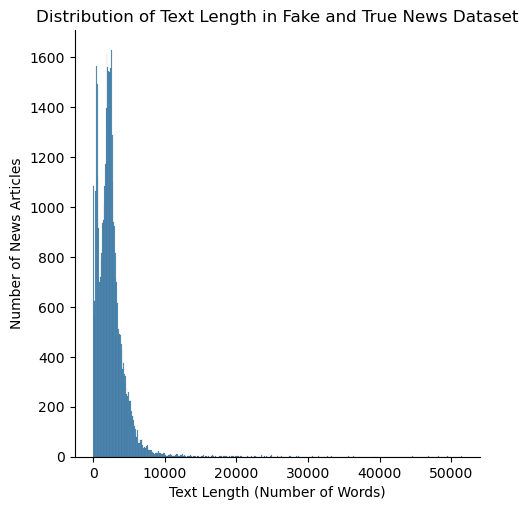

In [11]:
# Assignment 4: Exploratory Data Analysis (EDA)
# Plot text length distribution
dataframe["text_length"] = dataframe["text"].apply(len)
sns.displot(dataframe["text_length"])
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Number of News Articles")
plt.title("Distribution of Text Length in Fake and True News Dataset")
plt.show()

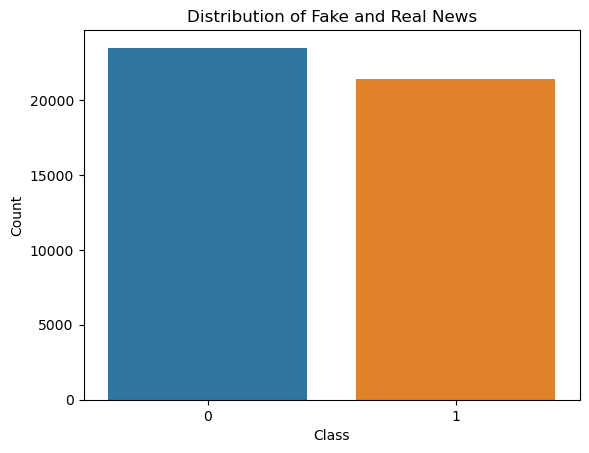

In [12]:
# Countplot for class distribution
sns.countplot(x="class", data=dataframe)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Fake and Real News")
plt.show()


In [13]:
# Assignment 3: Apply Decision Tree Algorithm
# Split the data into train and test sets
x = dataframe["text"]
y = dataframe["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [14]:
# Vectorize the text data
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [15]:
# Initialize and train Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [16]:
# Assignment 5: Apply Logistic Regression Model for Prediction
# Initialize and train Logistic Regression model
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [17]:
# Predictions using Logistic Regression model
pred_lr = LR.predict(xv_test)
print("LR Classification Report:\n", classification_report(y_test, pred_lr))


LR Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5834
           1       0.98      0.99      0.99      5391

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [18]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5834
           1       0.98      0.99      0.99      5391

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [19]:
# Assignment 6: Perform Time Series Analysis
# Filter out invalid date values
dataframe_merge = dataframe_merge[dataframe_merge['date'].str.contains('^https?:\/\/', na=False) == False]

In [20]:
# Convert date column to datetime format
dataframe_merge['date'] = pd.to_datetime(dataframe_merge['date'], errors='coerce')
dataframe_merge.dropna(subset=['date'], inplace=True)


In [21]:
# Set date column as index
dataframe_merge.set_index('date', inplace=True)

In [22]:
# Resample data by day and count number of articles
daily_news_count = dataframe_merge.resample('D').size()

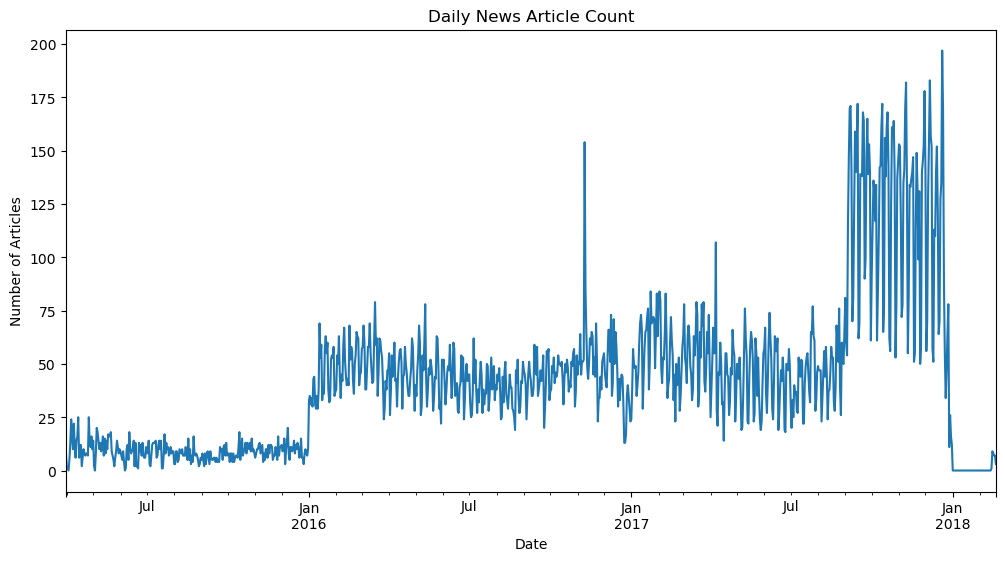

In [23]:
# Plot time series data
plt.figure(figsize=(12, 6))
daily_news_count.plot()
plt.title('Daily News Article Count')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [24]:
# Function to output prediction labels
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

In [25]:
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    print("\n\nLR Prediction: {}\nDT Prediction:".format(
          output_label(pred_LR[0]),
          output_label(pred_DT[0])
         ))

# Manual testing
news = input("Enter news for manual testing: ")
manual_testing(news)


Enter news for manual testing: As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan